# Data Assessment of Failiure Rates of American Banks.
## Use of Pandas and Matplotlib to answer a range of questions as a test exercise for Data Analytics.
### These questions were split into Basic, Intermediate, Complex and Data Visualisation. 
#### Basic
1. What was the total number of bank failures and the full time range of the dataset?
2. Which state had the most bank failures?
3. How many unique acquiring institutions were there?
#### Intermediate
1. What year saw the highest number of bank failures
2. Which three states had the most failures during that peak year?
3. Who was the top acquiring institution in Georgia (GA)?
4. What was the most common month for bank failures?
#### Advanced
1. What was the acquisition rate (percentage of acquired banks) for each year, and did it change during the financial crisis?
2. Did the top 5 "serial acquirers" specialize in certain geographic regions?
#### Data Visualisation 
1. Create a bar chart showing the total number of bank failures per year.
2. Create a single line chart comparing the failures per year for the top three states (GA, FL, IL).
3. Create a pie chart showing the market share of the top 5 acquirers, with all others grouped into a single "Others" category.
    1.  Refine into a bar chart to make it more visually appealing.


#### Data set from: https://www.fdic.gov/bank-failures/failed-bank-list 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


bankfail = pd.read_csv('20250827 - Bank Failiures.csv', encoding='latin-1')
#Import of datasets and pandas/matplot lib: Data set from: https://www.fdic.gov/bank-failures/failed-bank-list

In [3]:
bankfail.dtypes
bankfail.columns = bankfail.columns.str.strip()

In [4]:
bankfail['Closing Date'] = pd.to_datetime(bankfail['Closing Date'], format='%d-%b-%y')
#Conversion of Dtype Closing Date object to Closing date datetime 64, 

In [5]:
bankfail.dtypes

Bank Name                        object
City                             object
State                            object
Cert                              int64
Acquiring Institution            object
Closing Date             datetime64[ns]
Fund                              int64
dtype: object

In [6]:
bankfail['State'].value_counts()
#Overall value counts by stat

State
GA    93
FL    76
IL    70
CA    43
MN    23
WA    19
MO    16
AZ    16
MI    14
TX    14
KS    12
NV    12
WI    11
PA    11
CO    10
SC    10
MD    10
OH     9
UT     8
NJ     8
OK     8
AL     7
TN     7
NC     7
OR     6
NY     6
VA     5
PR     4
AR     4
LA     4
NE     4
KY     3
IN     3
NM     3
IA     3
CT     2
ID     2
WV     2
MS     2
MA     1
SD     1
WY     1
NH     1
HI     1
Name: count, dtype: int64

In [7]:
len(bankfail)
#Overall value counts by failed  bank

572

In [8]:
bankfail['Bank Name'].value_counts()

Bank Name
First State Bank                          3
The First State Bank                      3
Premier Bank                              3
Horizon Bank                              3
Legacy Bank                               2
                                         ..
First National Bank of Central Florida    1
Cortez Community Bank                     1
First Choice Community Bank               1
Community Central Bank                    1
Bank of Honolulu                          1
Name: count, Length: 553, dtype: int64

In [9]:
print(bankfail.isnull().sum())

Bank Name                0
City                     0
State                    0
Cert                     0
Acquiring Institution    0
Closing Date             0
Fund                     0
dtype: int64


In [10]:
bankfail['Closing Date'].head(1)

0   2025-06-27
Name: Closing Date, dtype: datetime64[ns]

In [11]:
bankfail['Closing Date'].tail(1)

571   2000-10-13
Name: Closing Date, dtype: datetime64[ns]

In [12]:
bankfail['Acquiring Institution'].value_counts()

Acquiring Institution
No Acquirer                            31
State Bank and Trust Company           12
First-Citizens Bank & Trust Company    11
Ameris Bank                            10
U.S. Bank N.A.                          9
                                       ..
Talmer Bank & Trust                     1
Trustmark National Bank                 1
Superior Bank, National Association     1
AloStar Bank of Commerce                1
Bank of the Orient                      1
Name: count, Length: 306, dtype: int64

In [13]:
bankfail['Acquiring Institution'].nunique()

306

1. What was the total number of bank failures and the full time range of the dataset?
    1. Total Failures and Time Range: The total number of failures was 572, and the time range of the dataset was from October 13, 2000, to June 27, 2025.
---

2. Which state had the most bank failures?
    1. State with most Failures: Georgia (GA) had the most bank failures with 93. 
---
3. How many unique acquiring institutions were there?
    1. Unique acquiring institutions: There were 306 unique acquiring institutions.

In [15]:
bankfail['Fail Year'] = bankfail['Closing Date'].dt.year

In [16]:
bankfail['Fail Year'].value_counts()

Fail Year
2010    157
2009    140
2011     92
2012     51
2008     25
2013     24
2014     18
2002     11
2015      8
2017      8
2016      5
2023      5
2001      4
2019      4
2020      4
2004      4
2007      3
2003      3
2025      2
2024      2
2000      2
Name: count, dtype: int64

In [17]:
bankfail.groupby('Fail Year')['State'].describe()

,count,unique,top,freq
Fail Year,,,,
2000,2,2,IL,1
2001,4,4,AR,1
2002,11,10,FL,2
2003,3,3,PA,1
2004,4,4,UT,1
2007,3,3,OH,1
2008,25,12,GA,5
2009,140,32,GA,25
2010,157,31,FL,29


In [18]:
bankfail2010 = bankfail[bankfail['Fail Year'] == 2010]

In [19]:
bankfail2010['State'].value_counts()

State
FL    29
GA    21
IL    16
CA    12
WA    11
MN     8
MO     6
MI     5
MD     4
AZ     4
NV     4
SC     4
NY     3
KS     3
PR     3
UT     3
OR     3
WI     2
PA     2
OH     2
NM     2
LA     1
AL     1
MA     1
NJ     1
MS     1
NE     1
OK     1
VA     1
AR     1
TX     1
Name: count, dtype: int64

In [20]:
bankfail_GeorgiaAcq = bankfail[bankfail['State'] == 'GA']

In [21]:
bankfail_GeorgiaAcq['Acquiring Institution'].value_counts()

Acquiring Institution
State Bank and Trust Company                   12
Ameris Bank                                     9
Community & Southern Bank                       8
No Acquirer                                     7
Bank of the Ozarks                              5
United Bank                                     4
Hamilton State Bank                             4
CertusBank, National Association                3
Stearns Bank, N.A.                              3
Fidelity Bank                                   3
Heritage Bank of the South                      3
First American Bank and Trust Company           2
Regions Bank                                    2
CharterBank                                     2
Renasant Bank                                   2
SCBT National Association                       2
Citizens South Bank                             2
Georgia Commerce Bank                           2
Bank of Upson                                   1
Bank of Essex               

In [22]:
bankfail['Fail Month'] = bankfail['Closing Date'].dt.month

In [23]:
bankfail

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,Fund,Fail Year,Fail Month
0,The Santa Anna National Bank,Santa Anna,TX,5520,Coleman County State Bank,2025-06-27,10549,2025,6
1,Pulaski Savings Bank,Chicago,IL,28611,Millennium Bank,2025-01-17,10548,2025,1
2,First National Bank of Lindsay,Lindsay,OK,4134,First Bank & Trust Co.,2024-10-18,10547,2024,10
3,Republic First Bank dba Republic Bank,Philadelphia,PA,27332,"Fulton Bank, National Association",2024-04-26,10546,2024,4
4,Citizens Bank,Sac City,IA,8758,Iowa Trust & Savings Bank,2023-11-03,10545,2023,11
...,...,...,...,...,...,...,...,...,...
567,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",2001-07-27,6004,2001,7
568,Malta National Bank,Malta,OH,6629,North Valley Bank,2001-05-03,4648,2001,5
569,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2001-02-02,4647,2001,2
570,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,2000-12-14,4646,2000,12


In [24]:
bankfail['Fail Month'].value_counts()

Fail Month
7     75
10    64
4     61
1     52
5     45
2     45
3     42
8     41
9     38
6     37
11    37
12    35
Name: count, dtype: int64

1. What year saw the highest number of bank failures?
   1. The year with the highest number of bank failures was 2010, with 157 failures.
---
2. Which three states had the most failures during that peak year?
   1. During the peak year of 2010, the three states with the most failures were Florida (FL), Georgia (GA), and Illinois (IL).
---
3. Who was the top acquiring institution in Georgia (GA)?
   1. The top acquiring institution in Georgia was State Bank and Trust Company.
---
4. What was the most common month for bank failures?
   1. The most common month for bank failures was July.


In [26]:
bankfail_Acq = bankfail['Acquiring Institution'] != 'No Acquirer'

In [27]:
bankfail_Acq

0      True
1      True
2      True
3      True
4      True
       ... 
567    True
568    True
569    True
570    True
571    True
Name: Acquiring Institution, Length: 572, dtype: bool

In [28]:
bankfail['Acq'] = bankfail_Acq

In [29]:
bankfail['Acq'].value_counts()

Acq
True     541
False     31
Name: count, dtype: int64

In [30]:
bankfail.groupby('Fail Year')['Acq'].mean()

Fail Year
2000    1.000000
2001    1.000000
2002    0.636364
2003    1.000000
2004    0.750000
2007    1.000000
2008    1.000000
2009    0.921429
2010    0.949045
2011    0.978261
2012    0.921569
2013    0.958333
2014    1.000000
2015    1.000000
2016    1.000000
2017    1.000000
2019    1.000000
2020    1.000000
2023    1.000000
2024    1.000000
2025    1.000000
Name: Acq, dtype: float64

In [31]:
bankfail_onlyacq = bankfail[bankfail['Acq'] == True]

In [32]:
bankfail_onlyacq

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,Fund,Fail Year,Fail Month,Acq
0,The Santa Anna National Bank,Santa Anna,TX,5520,Coleman County State Bank,2025-06-27,10549,2025,6,True
1,Pulaski Savings Bank,Chicago,IL,28611,Millennium Bank,2025-01-17,10548,2025,1,True
2,First National Bank of Lindsay,Lindsay,OK,4134,First Bank & Trust Co.,2024-10-18,10547,2024,10,True
3,Republic First Bank dba Republic Bank,Philadelphia,PA,27332,"Fulton Bank, National Association",2024-04-26,10546,2024,4,True
4,Citizens Bank,Sac City,IA,8758,Iowa Trust & Savings Bank,2023-11-03,10545,2023,11,True
...,...,...,...,...,...,...,...,...,...,...
567,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",2001-07-27,6004,2001,7,True
568,Malta National Bank,Malta,OH,6629,North Valley Bank,2001-05-03,4648,2001,5,True
569,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2001-02-02,4647,2001,2,True
570,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,2000-12-14,4646,2000,12,True


In [33]:
bankfail_onlyacq['Acquiring Institution'].value_counts()

Acquiring Institution
State Bank and Trust Company           12
First-Citizens Bank & Trust Company    11
Ameris Bank                            10
U.S. Bank N.A.                          9
Community & Southern Bank               8
                                       ..
Talmer Bank & Trust                     1
Trustmark National Bank                 1
Superior Bank, National Association     1
AloStar Bank of Commerce                1
Bank of the Orient                      1
Name: count, Length: 305, dtype: int64

In [34]:
topAcqList = ['State Bank and Trust Company', 'First-Citizens Bank & Trust Company', 'Ameris Bank', 'U.S. Bank N.A','Community & Southern Bank']

In [35]:
top5Acq = bankfail[bankfail['Acquiring Institution'].isin(topAcqList)]
print(top5Acq.head(5))

                                            Bank Name             City State  \
20  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...        Milwaukee    WI   
24                             Harvest Community Bank       Pennsville    NJ   
27                             First CornerStone Bank  King of Prussia    PA   
29                         North Milwaukee State Bank        Milwaukee    WI   
35                  Capitol City Bank & Trust Company          Atlanta    GA   

     Cert                Acquiring Institution Closing Date   Fund  Fail Year  \
20  30003  First-Citizens Bank & Trust Company   2017-05-05  10527       2017   
24  34951  First-Citizens Bank & Trust Company   2017-01-13  10523       2017   
27  35312  First-Citizens Bank & Trust Company   2016-05-06  10520       2016   
29  20364  First-Citizens Bank & Trust Company   2016-03-11  10518       2016   
35  33938  First-Citizens Bank & Trust Company   2015-02-13  10512       2015   

    Fail Month   Acq  
20       

In [36]:
top5Acq.groupby('Acquiring Institution')['State'].value_counts()

Acquiring Institution                State
Ameris Bank                          GA        9
                                     FL        1
Community & Southern Bank            GA        8
First-Citizens Bank & Trust Company  CA        2
                                     CO        2
                                     WI        2
                                     FL        1
                                     GA        1
                                     NJ        1
                                     PA        1
                                     WA        1
State Bank and Trust Company         GA       12
Name: count, dtype: int64

In [37]:
yearly_failures = bankfail['Fail Year'].value_counts()

1. What was the acquisition rate (percentage of acquired banks) for each year, and did it change during the financial crisis?
    1. the acquisition rate for failed banks remained very high in most years. Even during the peak of the financial crisis (2009-2012), the rate never dropped below approximately 92%.
---
2. Did the top 5 "serial acquirers" specialize in certain geographic regions?
    1. top acquirers were strong regional specialists (like State Bank and Trust Company, which focused only on Georgia). In contrast, others, like First-Citizens Bank & Trust Company, operated as national players, acquiring banks all across the country.

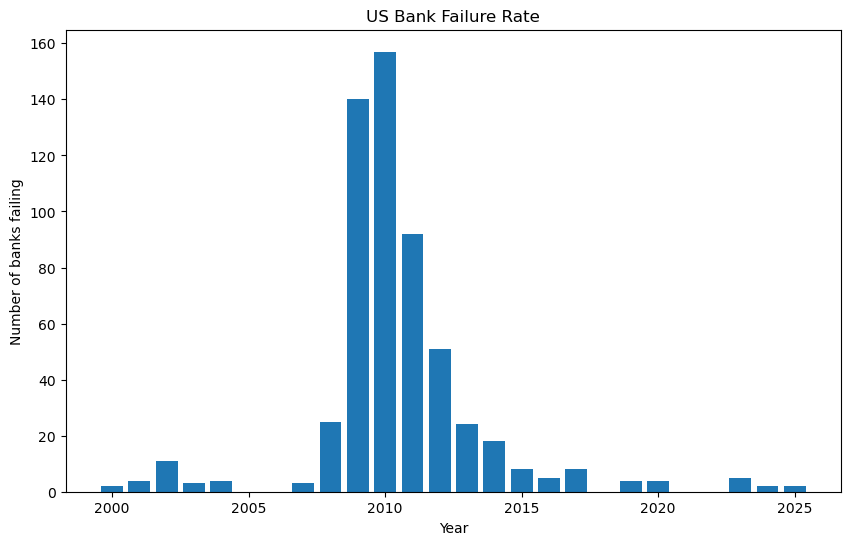

In [39]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x = yearly_failures.index, height =yearly_failures.values)
ax.set_title('US Bank Failure Rate')
ax.set_xlabel('Year')
ax.set_ylabel('Number of banks failing')
plt.show()

In [40]:
ga_failures_by_year = bankfail[bankfail['State'] == 'GA']['Fail Year'].value_counts().sort_index()
fl_failures_by_year = bankfail[bankfail['State'] == 'FL']['Fail Year'].value_counts().sort_index()
il_failures_by_year = bankfail[bankfail['State'] == 'IL']['Fail Year'].value_counts().sort_index()



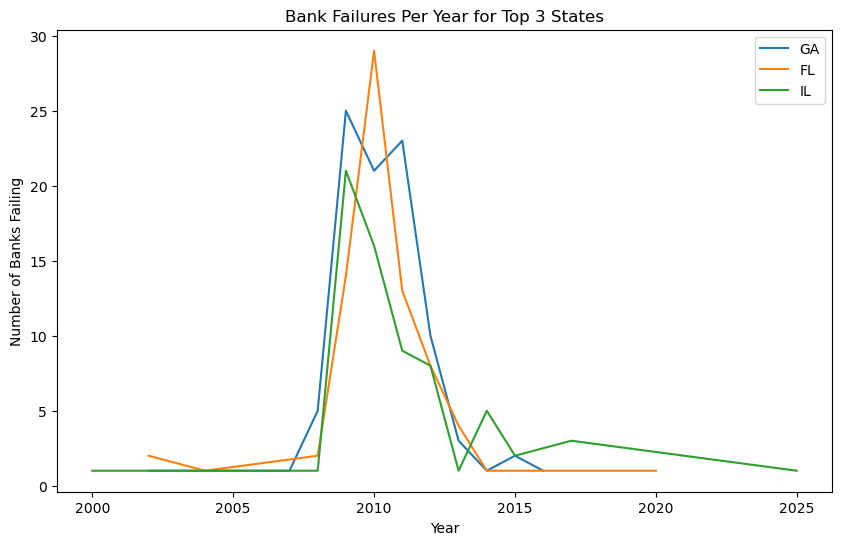

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ga_failures_by_year.index, ga_failures_by_year.values, label='GA')
ax.plot(fl_failures_by_year.index, fl_failures_by_year.values, label='FL')
ax.plot(il_failures_by_year.index, il_failures_by_year.values, label='IL')
ax.set_title('Bank Failures Per Year for Top 3 States')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Banks Failing')
ax.legend()

In [42]:
print(ga_failures_by_year.head())


Fail Year
2002     1
2007     1
2008     5
2009    25
2010    21
Name: count, dtype: int64


In [43]:
bankfail_onlyacq


FailCounts = bankfail_onlyacq['Acquiring Institution'].value_counts()
Top5FailCounts = FailCounts.head(5)
print (Top5FailCounts)

Acquiring Institution
State Bank and Trust Company           12
First-Citizens Bank & Trust Company    11
Ameris Bank                            10
U.S. Bank N.A.                          9
Community & Southern Bank               8
Name: count, dtype: int64


In [44]:
FailCounts = bankfail_onlyacq['Acquiring Institution'].value_counts()
FailcountsOth = FailCounts.iloc[5:]
FailCountsTotal = FailcountsOth.sum()

In [45]:
plot_data = Top5FailCounts.copy()
plot_data.loc['Others'] = FailCountsTotal

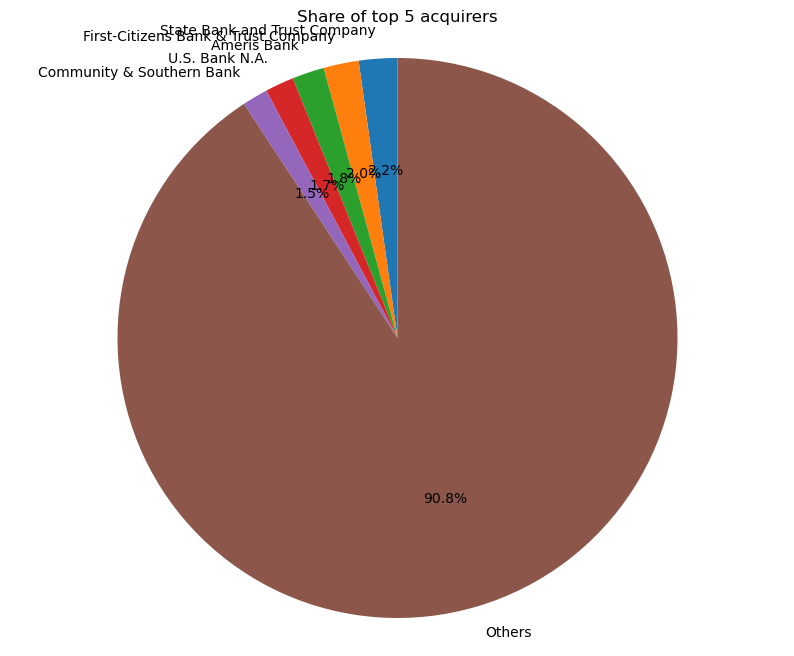

In [46]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.pie(plot_data,labels=plot_data.index,autopct='%1.1f%%',startangle=90)
ax.set_title('Share of top 5 acquirers')
ax.axis('equal')
plt.show()

[Text(5, 0, '491'),
 Text(5, 0, '12'),
 Text(5, 0, '11'),
 Text(5, 0, '10'),
 Text(5, 0, '9'),
 Text(5, 0, '8')]

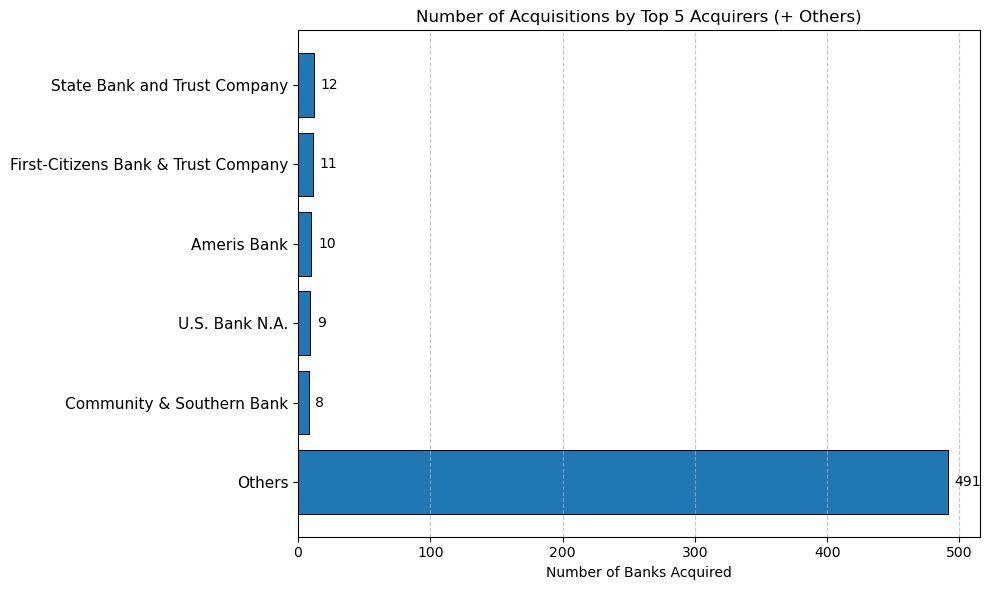

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_data_sorted = plot_data.sort_values(ascending=False)
ax.barh(plot_data.index, plot_data.values)
ax.invert_yaxis()
ax.set_title('Number of Acquisitions by Top 5 Acquirers (+ Others)')
ax.set_xlabel('Number of Banks Acquired')
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=11)
ax.grid (axis = 'x', linestyle ='--',alpha=0.7)
plt.tight_layout()
bars = ax.barh(plot_data_sorted.index, plot_data_sorted.values, color='#1f77b4', edgecolor='black', linewidth=0.7)
ax.bar_label(bars, padding=5)

